<a href="https://colab.research.google.com/github/jdgomezmo/ENAM/blob/main/Evaluaci%C3%B3n_ENAM_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
!pip install geopandas
import geopandas as gpd
import pandas as pd
import seaborn as sns
!pip install -U plotly
import plotly.graph_objs as go 
import plotly.express as px

# **PROYECTO: EVALUACIÓN DE COSECHA**
___





##**1. Cargue de las bases de datos.**
Se cargan las tablas **Siembras** y **Cosechas** de los respectivos semestres a evaluar, cabe resaltar que a travez de los semestres columnas han sido añadidas a la estructura de las tablas de salida. *Se recomienda hacer ese ajuste antes de cargarlas al notebook*


In [ ]:
###Cargar los archivos a utilizar
from google.colab import files
uploaded = files.upload()

## **2. Integración de  las bases de datos**

In [ ]:
## Integración tablas siembras 
s17a = pd.read_csv('siembras2017a.csv', header=0, sep=';')
s17b = pd.read_csv('siembras2017b.csv', header=0, sep=';')
s18a = pd.read_csv('siembras2018a.csv', header=0, sep=';')
s18b = pd.read_csv('siembras2018b.csv', header=0, sep=';')
s19a = pd.read_csv('siembras2019a.csv', header=0, sep=';')
s19b = pd.read_csv('siembras2019b.csv', header=0, sep=';')
s20a = pd.read_csv('siembras2020a.csv', header=0, sep=';')
siembras_raw = pd.concat([s17a,s17b,s18a,s18b,s19a,s19b,s20a])

In [ ]:
## Integración tablas cosechas 
c17a = pd.read_csv('cosechas2017a.csv', header=0, sep=';')
c17b = pd.read_csv('cosechas2017b.csv', header=0, sep=';')
c18a = pd.read_csv('cosechas2018a.csv', header=0, sep=';')
c18b = pd.read_csv('cosechas2018b.csv', header=0, sep=';')
c19a = pd.read_csv('cosechas2019a.csv', header=0, sep=';')
c19b = pd.read_csv('cosechas2019b.csv', header=0, sep=';')
c20a = pd.read_csv('cosechas2020a.csv', header=0, sep=';')
cosechas_raw = pd.concat([c17a,c17b,c18a,c18b,c19a,c19b,c20a])

**Se aplica una estadísitica descriptiva a las dos bases de datos con el fin de entender los datos e identificar datos nulos y siembras o cosechas iguales a 0.**

In [ ]:
# Estadística descriptiva del área sembrada
siembras_raw.groupby('ANIO_ENC')['AREA_SEMB'].describe()

,count,mean,std,min,25%,50%,75%,max
ANIO_ENC,,,,,,,,
2017,3327.0,19.679748,22.378628,0.2,7.2,13.0,23.0,256.00
2018,3560.0,17.016868,21.394131,0.0,5.0,11.0,21.0,300.00
2019,2825.0,18.553306,19.985761,0.3,7.0,13.0,22.0,265.00
2020,1462.0,18.631375,21.600017,0.0,6.0,13.0,23.0,253.01


In [ ]:
## Estadística descriptiva del área cosechada
cosechas_raw.groupby('ANIO_ENC')['AREA_COS'].describe()

,count,mean,std,min,25%,50%,75%,max
ANIO_ENC,,,,,,,,
2017,2873.0,24.525691,30.680879,0.18,8.0,16.0,30.00,421.50
2018,2737.0,24.232839,29.534697,0.20,8.0,16.0,30.00,454.87
2019,2675.0,20.681080,23.811831,0.00,7.0,14.0,25.00,300.00
2020,1361.0,16.997597,19.516117,0.00,5.0,12.0,21.49,221.00


##**3. Preparación de los datos**



In [ ]:
#### Limpieza de datos siembras y cosechas
# Siembras
siembras = siembras_raw[siembras_raw['MESSIEMBRA'].notna()]
# Cosechas
cosechas_raw['TON_HA'] = cosechas_raw['KG_HA'] / 1000
cosechas = cosechas_raw[cosechas_raw['COS_ACT_SN']== 'SI']

In [ ]:
print(siembras.head(3))
print(cosechas.head(3))

   ANIO_ENC SEMESTRE  ID_COFINCA  ... AREA_SEMB OBS_SIE_SN  OBS_SIE
0      2017        A  7340814591  ...      18.0         NO      NaN
1      2017        A  7340814615  ...      10.0         NO      NaN
2      2017        A  7340814615  ...      20.0         NO      NaN

[3 rows x 80 columns]
     ANIO_ENC SEMESTRE  ID_COFINCA  LATITUD  ...   KG_HA  OBS_COS_SN  OBS_COS TON_HA
342      2017        A  1800139194  2.67928  ...  6250.0          NO      NaN   6.25
343      2017        A  1825639184  2.67923  ...  7500.0          NO      NaN   7.50
344      2017        A  1859239189  2.67904  ...  6250.0          NO      NaN   6.25

[3 rows x 80 columns]


In [ ]:
# Estadística descriptiva del área sembrada despues de limpieza
siembras.groupby('ANIO_ENC')['AREA_SEMB'].describe()

,count,mean,std,min,25%,50%,75%,max
ANIO_ENC,,,,,,,,
2017,3327.0,19.679748,22.378628,0.2,7.2,13.0,23.0,256.00
2018,3209.0,18.878171,21.740277,0.2,7.0,12.0,23.0,300.00
2019,2825.0,18.553306,19.985761,0.3,7.0,13.0,22.0,265.00
2020,1340.0,20.327664,21.784468,0.3,8.0,15.0,25.0,253.01


In [ ]:
# # Estadística descriptiva del área cosechada despues de limpieza
cosechas.groupby('ANIO_ENC')['AREA_COS'].describe()

,count,mean,std,min,25%,50%,75%,max
ANIO_ENC,,,,,,,,
2017,2873.0,24.525691,30.680879,0.18,8.0,16.0,30.0,421.50
2018,2737.0,24.232839,29.534697,0.20,8.0,16.0,30.0,454.87
2019,2594.0,21.326866,23.894297,0.20,8.0,15.0,25.0,300.00
2020,1181.0,19.588256,19.702526,0.25,8.0,15.0,24.0,221.00


In [ ]:
### Estadística descriptiva del rendimiento despues de limpieza
cosechas.groupby('ANIO_ENC')['TON_HA'].describe()

,count,mean,std,min,25%,50%,75%,max
ANIO_ENC,,,,,,,,
2017,2873.0,7.228414,1.108011,0.1000,6.5625,7.2500,7.9375,11.1875
2018,2737.0,7.222929,1.139644,0.5625,6.5000,7.1875,8.0000,12.5000
2019,2594.0,7.460563,1.104890,1.8750,6.8750,7.5000,8.1250,11.3125
2020,1181.0,7.452885,1.142347,0.1350,6.8750,7.5000,8.1250,12.0000


##**4. Zona de estudio.**

###*4.1. Zonas arroceras de Colombia.*


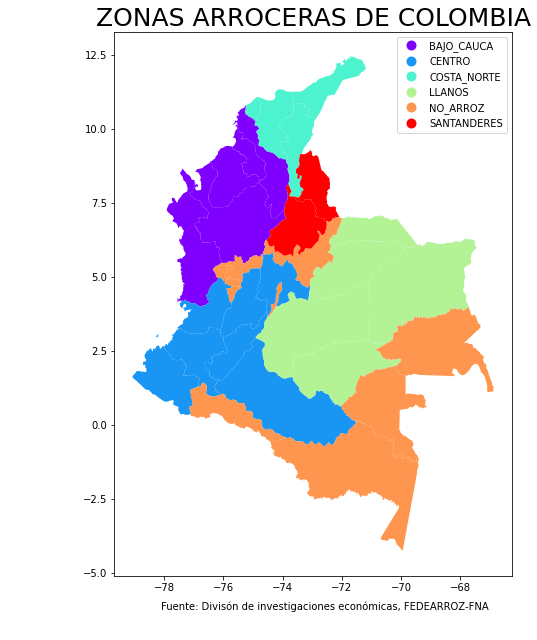

In [ ]:
zonas_pre = gpd.read_file("depto.shp")
zonas_pre.set_index('NOMBRE_DPT')
zonas = zonas_pre.drop([32])
zonas = zonas.to_crs(epsg=4326)
fig1, ax = plt.subplots(figsize=(20, 10))
zonas.plot(column='ZONA_ARROZ', ax=ax, cmap='rainbow', linewidth=0.8, categorical=True, legend=True);
ax.axis('scaled');
ax.set_title('ZONAS ARROCERAS DE COLOMBIA', fontdict={'fontsize': '25', 'fontweight' : '3'});
ax.annotate('Fuente: Divisón de investigaciones económicas, FEDEARROZ-FNA',xy=(0.3, 0.06),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=10, color='black');

###*4.2. Zona a evaluar*



In [ ]:
def zona_evaluada(zone):
  zona = zonas[zonas['ZONA_ARROZ'] == zone]
  zona.to_crs(epsg=4326)
  fig2, ax = plt.subplots(figsize=(10, 10));
  zona.plot(column='NOMBRE_DPT', ax=ax, cmap='rainbow', linewidth=0.8, categorical=True, legend=True);
  ax.axis('scaled');
  ax.set_title(f'ZONA {zone}', fontdict={'fontsize': '25', 'fontweight' : '3'});
  ax.annotate('Fuente: Divisón de investigaciones económicas, FEDEARROZ-FNA',xy=(0.3, 0.06),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=10, color='black');
  return fig2, ax

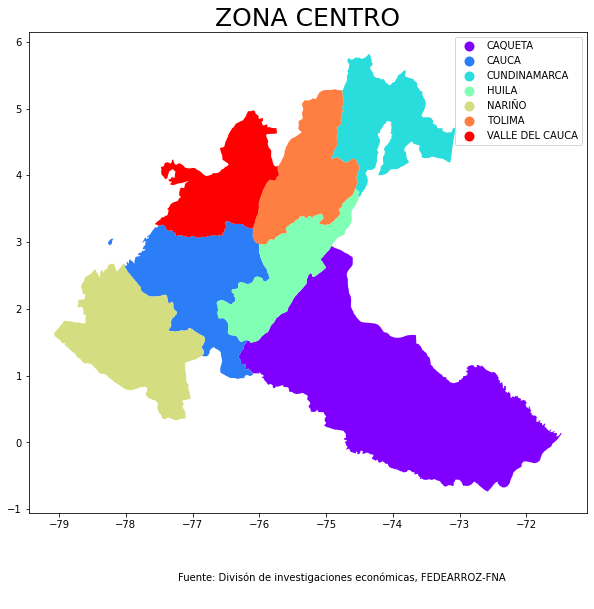

In [ ]:
zona_evaluada('CENTRO');

# **ANALISIS POR ZONA**

## **5. Áreas definitivas**


In [ ]:
###AREAS TOTALES
areas_def = pd.read_csv('areas_definitivas.csv', header=0, sep=';')
areas_def1 = areas_def.set_index('DEPARTAMENTO').T
areas_def1['*OTROS'] = areas_def1['ZONA CENTRO'] - areas_def1['TOLIMA'] - areas_def1['HUILA']
areas_def1

DEPARTAMENTO,TOLIMA,HUILA,ZONA CENTRO,*OTROS
2017A,53099,17190,74439,4150
2017B,54421,16403,74632,3808
2018A,55251,16219,75902,4432
2018B,51189,18067,72312,3056
2019A,47276,14843,65976,3857
2019B,49879,17955,70453,2619
2020A,53026,17178,73735,3531


In [ ]:
### DEFINICIÓN DE AÑOS EVALUADOS
ano_max = int(areas_def1.reset_index()['index'].str.extract('(\d+)').astype(int).max())
ano_min = int(areas_def1.reset_index()['index'].str.extract('(\d+)').astype(int).min())

In [ ]:
### ÁREAS TOTALES 2017 A 2020
fig = px.line(areas_def1, labels={'index':'', 'value':'Área sembrada (ha)'}, title=(f'ÁREA SEMBRADA DESDE {ano_min} A {ano_max}'))
fig.update_traces(mode='markers+lines', marker=dict(size=20))


## **6. Distribución de siembras por año por semestre**

La siguiente función es para generar un grafico de barras de la distribución de siembras mensual en el **semestre** y en el **año** que se requiera.

In [ ]:
def distribución_siembras(año, semestre):
  s = pd.DataFrame(siembras.loc[(siembras['ANIO_ENC'] == año)&(siembras['SEMESTRE'] == semestre)].groupby('MESSIEMBRA').sum()['AREA_SEMB']).reset_index()
  s['PORC'] = (s['AREA_SEMB']/s['AREA_SEMB'].sum())*100
  if semestre == 'A':
    meses = {'MESSIEMBRA':['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO']}
  else:
    meses = {'MESSIEMBRA':['JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']}
  fig = px.bar(s, x='MESSIEMBRA', y='PORC', title=(f'Año: {año} Semestre: {semestre}'), color='MESSIEMBRA', category_orders=meses, labels={'MESSIEMBRA': 'Mes', 'PORC':'Área sembrada (%)'})
  return fig.show()

In [ ]:
## DISTRIBUCIÓN DE ÁREA POR AÑO (ej:2019)
distribución_siembras(2020,'A');

## **7. Distribución de siembras por mes por semestre**

In [ ]:
anomaxa = siembras[siembras['SEMESTRE'] == 'A'].iloc[:,0].max()
anomina = siembras[siembras['SEMESTRE'] == 'A'].iloc[:,0].min()
anomaxb = siembras[siembras['SEMESTRE'] == 'B'].iloc[:,0].max()
anominb = siembras[siembras['SEMESTRE'] == 'B'].iloc[:,0].min()

La siguiente función es para generar un grafico de barras de la distribución de siembras mensual en los **años** que se están evaluando para el semestre **A** y **B**.

In [ ]:
# ejecutar simepre antes de generar la grafica
def crear_porcentaje(año, semestre):
  s = pd.DataFrame(siembras.loc[(siembras['ANIO_ENC'] == año)&(siembras['SEMESTRE'] == semestre)].groupby('MESSIEMBRA').sum()['AREA_SEMB']).reset_index()
  s['PORC'] = (s['AREA_SEMB']/s['AREA_SEMB'].sum())*100
  s['ANO'] = año
  s['SEM'] = semestre
  return s

### *Semestre A*

In [ ]:
fig = go.Figure(
    data=[
        go.Bar(name='2017A', x=crear_porcentaje(2017,'A')['MESSIEMBRA'], y=crear_porcentaje(2017,'A')['PORC'], offsetgroup=1),
        go.Bar(name='2018A', x=crear_porcentaje(2018,'A')['MESSIEMBRA'], y=crear_porcentaje(2018,'A')['PORC'], offsetgroup=2),
        go.Bar(name='2019A', x=crear_porcentaje(2019,'A')['MESSIEMBRA'], y=crear_porcentaje(2019,'A')['PORC'], offsetgroup=3),
        go.Bar(name='2020A', x=crear_porcentaje(2020,'A')['MESSIEMBRA'], y=crear_porcentaje(2020,'A')['PORC'], offsetgroup=4)
    ],
    layout={
        'yaxis': {'title': 'Área sembrada %'}
    }
)

fig.update_layout(barmode='group', title={'text':f'DISTRIBUCIÓN MENSUAL DE SIEMBRAS DESDE EL AÑO {anomina} HASTA EL AÑO {anomaxa}, SEMESTRE A', 'y':0.9,'x':0.5}, legend_title='Años')
fig.update_xaxes(categoryorder='array', categoryarray=['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO'])
fig.show()

### *Semestre B*

In [ ]:
fig = go.Figure(
    data=[
        go.Bar(name='2017B', x=crear_porcentaje(2017,'B')['MESSIEMBRA'], y=crear_porcentaje(2017,'B')['PORC'], offsetgroup=1),
        go.Bar(name='2018B', x=crear_porcentaje(2018,'B')['MESSIEMBRA'], y=crear_porcentaje(2018,'B')['PORC'], offsetgroup=2),
        go.Bar(name='2019B', x=crear_porcentaje(2019,'B')['MESSIEMBRA'], y=crear_porcentaje(2019,'B')['PORC'], offsetgroup=3),
    ],
    layout={
        'yaxis': {'title': 'Área sembrada %'}
    }
)

# Change the bar mode
fig.update_layout(barmode='group', title={'text':f'DISTRIBUCIÓN MENSUAL DE SIEMBRAS DESDE {anominb} HASTA {anomaxb}, SEMESTRE B', 'y':0.9,'x':0.5}, legend_title='Años')
fig.update_xaxes(categoryorder='array', categoryarray=['JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE'])
fig.show()

## **8. Área por tipo de semilla por año y por semestre**

La siguiente función es para generar un grafico de barras del tipo de semilla utilizada en los **años** que se están evaluando para el semestre **A** y **B**.

In [ ]:
# ejecutar simepre antes de generar la grafica
def semilla_tipo(año, semestre):
  tipo = pd.DataFrame(siembras.loc[(siembras['ANIO_ENC'] == año)&(siembras['SEMESTRE'] == semestre)].groupby('SEMI_TIPO').sum()['AREA_SEMB']).reset_index()
  tipo['PORC'] = (tipo['AREA_SEMB']/tipo['AREA_SEMB'].sum())*100
  return tipo

def semilla_semestre(semestre):
  anos = siembras.loc[siembras['SEMESTRE'] == semestre]['ANIO_ENC'].unique().tolist()
  cert =[]
  no_cert = []
  for i in anos:
    cc = semilla_tipo(i,semestre).iloc[0,2]
    cert.append(cc)
    nn = semilla_tipo(i,semestre).iloc[1,2]
    no_cert.append(nn)
  return cert, no_cert

### *Semestre A*

In [ ]:
# GRAFICA SEMESTRE A
cert, no_cert = semilla_semestre('A')
import plotly.graph_objects as go
anos = siembras.loc[siembras['SEMESTRE'] == 'A']['ANIO_ENC'].unique().tolist()
fig = go.Figure()
fig.add_trace(go.Bar(
    y=anos,
    x=cert,
    name='CERTIFICADA',
    orientation='h',
    marker=dict(
        color='rgba(50, 100, 200, 0.8)',
        line=dict(color='rgba(50, 100, 200, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    y=anos,
    x=no_cert,
    name='NO CERTIFICADA',
    orientation='h',
    marker=dict(
        color='rgba(250, 71, 80, 0.6)',
        line=dict(color='rgba(220, 71, 80, 0.8)', width=3)
    )
))

fig.update_layout(barmode='stack',title={'text':f'PARTICIPACIÓN POR TIPO DE SEMILLA DESDE {anomina} HASTA EL AÑO {anomaxa}, SEMESTRE A', 'y':0.9,'x':0.5}, legend_title='Tipo de semilla')
fig.update_yaxes(type='category', title_text='AÑOS')
fig.update_xaxes(title_text='%')
fig.show()

### *Semestre B*

In [ ]:
# GRAFICA SEMESTRE B
cert, no_cert = semilla_semestre('B')
import plotly.graph_objects as go
anos = siembras.loc[siembras['SEMESTRE'] == 'B']['ANIO_ENC'].unique().tolist()
fig = go.Figure()
fig.add_trace(go.Bar(
    y=anos,
    x=cert,
    name='CERTIFICADA',
    orientation='h',
    marker=dict(
        color='rgba(50, 100, 200, 0.8)',
        line=dict(color='rgba(50, 100, 200, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    y=anos,
    x=no_cert,
    name='NO CERTIFICADA',
    orientation='h',
    marker=dict(
        color='rgba(250, 71, 80, 0.6)',
        line=dict(color='rgba(220, 71, 80, 0.8)', width=3)
    )
))

fig.update_layout(barmode='stack',title={'text':f'PARTICIPACIÓN POR TIPO DE SEMILLA DESDE {anomina} HASTA EL AÑO {anomaxa}, SEMESTRE B', 'y':0.9,'x':0.5}, legend_title='Tipo de semilla')
fig.update_yaxes(type='category', title_text='AÑOS')
fig.update_xaxes(title_text='%')
fig.show()

## **9. Área sembrada por variedad** 





In [ ]:
def crear_porcentaje_variedad(año, semestre):
  s = pd.DataFrame(siembras.loc[(siembras['ANIO_ENC'] == año)&(siembras['SEMESTRE'] == semestre)].groupby('VARIEDAD').sum()['AREA_SEMB']).reset_index()
  s['%_'] = (s['AREA_SEMB']/s['AREA_SEMB'].sum())*100
  s['ANO'] = año
  s['SEM'] = semestre
  return s

### *Semestre A*

In [ ]:
pv17a = crear_porcentaje_variedad(2017,'A')
pv18a = crear_porcentaje_variedad(2018,'A')
pv19a = crear_porcentaje_variedad(2019,'A')
pv20a = crear_porcentaje_variedad(2020,'A')  
pva = pd.concat([pv17a, pv18a, pv19a, pv20a], join="inner").sort_values(by=['AREA_SEMB'], ascending=False)
pva_test = pd.merge(pv17a, pv18a, on="VARIEDAD", how='outer', suffixes=('2017', '2018'))
pva_test1 = pd.merge(pva_test, pv19a, on="VARIEDAD", how='outer', suffixes=( None, '2019'))
pva_test2 = pd.merge(pva_test1, pv20a, on="VARIEDAD", how='outer', suffixes=('2019','2020'))
pva_final = pva_test2[['VARIEDAD', '%_2017', '%_2018', '%_2019', '%_2020']].set_index('VARIEDAD')

In [ ]:
fig = px.bar()
for i,n in enumerate(pva_final.columns):
    fig.add_bar(x=pva_final.index, y= pva_final[pva_final.columns[i]], name= pva_final.columns[i])
    fig.update_layout(
      updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.6,
            y=1.2,
            buttons=list([
                dict(label=pva_final.columns[0],
                     method="update",
                     args=[ {"visible": [True, False, False, False]},
                            {'showlegend' : True}
                        ]),
                dict(label=pva_final.columns[1],
                     method="update",
                     args=[ {"visible": [False, True, False, False]},
                            {'showlegend' : True}
                     ]),
                dict(label=pva_final.columns[2],
                     method="update",
                     args=[ {"visible": [False, False, True, False]},
                            {'showlegend' : True}
                        ]),
                dict(label=pva_final.columns[3],
                     method="update",
                     args=[ {"visible": [False, False, False, True]},
                            {'showlegend' : True}
                     ]),
            ]),
        )
    ]
)

fig.show()

### *Semestre B*

In [ ]:
pv17b = crear_porcentaje_variedad(2017,'B')
pv18b = crear_porcentaje_variedad(2018,'B')
pv19b = crear_porcentaje_variedad(2019,'B')
 
pvb = pd.concat([pv17b, pv18b, pv19b], join="inner").sort_values(by=['AREA_SEMB'], ascending=False)
pvb_test = pd.merge(pv17b, pv18b, on="VARIEDAD", how='outer', suffixes=('2017', None))
pvb_test1 = pd.merge(pvb_test, pv19b, on="VARIEDAD", how='outer', suffixes=( '2018', '2019'))
#pva_test2 = pd.merge(pva_test1, pv20a, on="VARIEDAD", how='outer', suffixes=('2019','2020')) en la grafica para actualizar crear el boton del ultimo semestre
pvb_final = pvb_test1[['VARIEDAD', '%_2017', '%_2018', '%_2019']].set_index('VARIEDAD')

In [ ]:
fig = px.bar()
for i,n in enumerate(pvb_final.columns):
    fig.add_bar(x=pvb_final.index, y= pvb_final[pvb_final.columns[i]], name= pvb_final.columns[i])
    fig.update_layout(
      updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.6,
            y=1.2,
            buttons=list([
                dict(label=pvb_final.columns[0],
                     method="update",
                     args=[ {"visible": [True, False, False, False]},
                            {'showlegend' : True}
                        ]),
                dict(label=pvb_final.columns[1],
                     method="update",
                     args=[ {"visible": [False, True, False, False]},
                            {'showlegend' : True}
                     ]),
                dict(label=pvb_final.columns[2],
                     method="update",
                     args=[ {"visible": [False, False, True, False]},
                            {'showlegend' : True}
                        ]),

            ]),
        )
    ]
)

fig.show()

## **10. Diez variedades mas sembradas**

### Función para crear una grafica de barras horizontal con las diez variedades mas sembradas en el año y el semestre que se requiera.

In [ ]:
def diez_mas_sembradas(año, semestre):
  v = siembras.loc[(siembras['ANIO_ENC'] == año)&(siembras['SEMESTRE']== semestre)].groupby('VARIEDAD').sum().reset_index().sort_values(by=['AREA_SEMB'], ascending=False).head(10)
  fig = px.bar(v, x='AREA_SEMB', y='VARIEDAD', title=(f'Año: {año} Semestre: {semestre} '), color='VARIEDAD', labels={'AREA_SEMB': 'Área sembrada (ha)'})
  return fig.show()

In [ ]:
diez_mas_sembradas(2018, 'A');

##**11. Rendimiento ponderado en los periodos evaluados.**


In [ ]:
cosechas1 = cosechas.copy()
cosechas1['AXR'] = cosechas.iloc[:,79]*cosechas.iloc[:,69]
cos = cosechas1.groupby(['ANIO_ENC', 'SEMESTRE']).sum()
coss = pd.DataFrame(cos['AXR']/cos['AREA_COS']).reset_index(level=[0,1]).rename(columns={0: 'R'})
coss['PERIODO'] = coss['ANIO_ENC'].astype(str) + coss['SEMESTRE']
fig = px.line(coss, x= 'PERIODO', y='R', labels={'R':'ton/ha'})
fig.update_layout(title={'text':f'RENDIMIENTOS EN T/HA DESDE {ano_min} HASTA {ano_max}', 'y':0.96,'x':0.5}, legend_title='Años')
fig.update_traces(mode='markers+lines', marker=dict(size=20, color='chocolate'), line=dict(color='darkorange'))
fig.update_xaxes(dtick=1)
fig.update_yaxes(dtick=0.25, range=[7, 8])
fig.show()

##**12. Distribución de los rendimientos por año para el semestre *A* y *B*.**


### *Semestre A*

In [ ]:
cos_a = cosechas[cosechas['SEMESTRE']=='A']
fig = px.box(cos_a, x='ANIO_ENC', y='TON_HA', color='ANIO_ENC')
fig.update_layout(title={'text':f'DISTRIBUCIÓN DE RENDIMIENTOS DESDE EL AÑO {anomina} HASTA EL AÑO {anomaxa}, SEMESTRE A', 'y':0.95,'x':0.5}, legend_title='Años')
fig.update_xaxes(title_text='PERIODO')
fig.update_yaxes(title_text='t/ha')
fig.show()

### *Semestre B*

In [ ]:
cos_b = cosechas[cosechas['SEMESTRE']=='B']
fig = px.box(cos_a, x='ANIO_ENC', y='TON_HA', color='ANIO_ENC')
fig.update_layout(title={'text':f'DISTRIBUCIÓN DE RENDIMIENTOS DESDE EL AÑO {anomina} HASTA EL AÑO {anomaxa}, SEMESTRE B', 'y':0.95,'x':0.5}, legend_title='Años')
fig.update_xaxes(title_text='PERIODO')
fig.update_yaxes(title_text='t/ha')
fig.show()

##**13. Rendimiento mensual en los años evaluados**

In [ ]:
cosm = cosechas1.groupby(['ANIO_ENC', 'SEMESTRE', 'MESCOSECHA']).sum()
cossm = pd.DataFrame(cosm['AXR']/cosm['AREA_COS']).reset_index(level=[0,1,2]).rename(columns={0: 'R'})
cossm['PERIODO'] = cossm['ANIO_ENC'].astype(str) + cossm['SEMESTRE']
m = {'ENERO': 1, 'FEBRERO': 2, 'MARZO':3, 'ABRIL':4, 'MAYO':5, 'JUNIO':6, 'JULIO':7, 'AGOSTO': 8, 'SEPTIEMBRE':9, 'OCTUBRE':10, 'NOVIEMBRE':11, 'DICIEMBRE':12}
cossm1 = cossm.replace(m).sort_values(['ANIO_ENC', 'SEMESTRE', 'MESCOSECHA'])
fig = px.line(cossm1, x='MESCOSECHA', y='R', color='ANIO_ENC')
fig.update_layout(title={'text':f'RENDIMIENTOS MENSUALES EN T/HA DESDE {ano_min} HASTA {ano_max}', 'y':0.96,'x':0.5},
                  legend_title='Años', xaxis = dict(tickmode = 'array',
                                                    tickvals = [1,2,3,4,5,6,7,8,9,10,11,12],
                                                    ticktext = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic' ]))
fig.update_traces(mode='markers+lines', marker=dict(size=10))
fig.update_xaxes(dtick=1, title='MES DE COSECHA')
fig.update_yaxes(dtick=0.25, range=[7, 8], title= 't/ha')
fig.show()

##**14. Rendimiento por variedad en el año y el semestre indicado**
***esta información solo se obtiene desde 2019 semestre A***




In [ ]:
def rendimiento_por_variedad(año, semestre):
  cosv = cosechas1.groupby(['ANIO_ENC', 'SEMESTRE', 'VARCOS']).sum()
  cosv['R'] = pd.DataFrame(cosv['AXR']/cosv['AREA_COS'])
  cossv = cosv.reset_index(level=[0,1,2])
  cossv1 = cossv.loc[(cossv['ANIO_ENC']== año)&(cossv['SEMESTRE']== semestre)].sort_values(by=['AREA_COS'], ascending=False)
  fig = px.bar(cossv1, x='VARCOS', y='R', color='AREA_COS', color_continuous_scale='aggrnyl', labels={'VARCOS': 'VARIEDAD COSECHADA', 'R':'t/ha'})
  fig.update_layout(title={'text':f'RENDIMIENTOS POR VARIEDAD T/HA EN EL AÑO {año} EN EL SEMESTRE {semestre}', 'y':0.96,'x':0.5},
                    legend_title='Área cosechada (ha)', 
                    coloraxis_colorbar=dict(title='Area cosechada (ha)'))
  return fig

In [ ]:
rendimiento_por_variedad(2020,'A')